## Reto

In [1]:
# Dada la información del archivo .json sobre Recursos Educativos Abiertos y las universidades a las que
# pertenecen, el archivo está en la carpeta data, realizar el siguiente reto
# 1. Leer y explorar el archivo
# 2. Generar una estructura que tenga una lista de tuplas.
# 2.1. Cada tupla tendrá 2 posiciones
# 2.2. La posición 0 de la tupla estará compuesta por la latitud, longitud y nombre de universidad
# 2.3. La posición 1 de la tupla estará compuesta por una cadena con el nombre de la universidad
# 2. Generar un widgets de tipo Dropdown
# 3. El widget debe permitir seleccionar una Universidad.
# 3.1 Atención, el valor por defecto del widget a usar es: value=('-1.294246', '36.786794', 'African Virtual University')
# 3.2 Agregar en la caractarística options del Dropdown la estructura generada
# 4. Cuando se seleccione una universidad, se debe ejecutar las sentencias que usen ipyleaflet y pinte en un mapa
#    la universidad.
# 4.1 Al momento de poner el mouse sobre el Marker, debe presentarse la universidad
# Debe considerar que existen valores de tipo None entre la latitud y longitud de los datos dados. Si se da el caso, 
# no debe presentar nada en el mapa

In [2]:
from ipyleaflet import Map, MagnifyingGlass, basemaps, basemap_to_tiles, Marker
import pandas as pd
import ipywidgets as widgets

In [3]:
# 1. Leer y explorar el archivo
datos = pd.read_json("data/ocw_universidades.json")
datos.head(3)

,universityName,universityLat,universityLong,universityLogo,universityDescription,universityContinent,universityCountry,universityCity,universityURL,universityOCWURL,...,platform,platformURL,consortium,consortiumURL,language,languageURL,license,licenseURL,ocw,ocwURL
0,African Virtual University,-1.294246,36.786794,http://rsis.web.cern.ch/rsis/09Sponsors/avu.jpg,The African Virtual University (AVU) is a Pan ...,Africa,Kenia,Nairobi,http://www.avu.org/,http://oer.avu.org/,...,Dspace,Flamenco?q=UniversityOCWPlataform:1&group=Univ...,Open CourseWare Consortium,http://www.ocwconsortium.org/,English,Flamenco?q=Language:5&group=Language,Creative Commons Attribution-ShareAlike 3.0,http://creativecommons.org/licenses/by-sa/3.0/,201,Flamenco?q=UniversityName:2&group=UniversityName
1,AGH University of Science and Technology,50.064529,19.923750,http://agh.edu.pl/files/header/naglowek-glowny...,AGH University of Science and Technology (Poli...,Europe,Poland,Kraków,http://agh.edu.pl/,http://open.agh.edu.pl/,...,e-learning,Flamenco?q=UniversityOCWPlataform:6&group=Univ...,Open CourseWare Consortium,http://www.ocwconsortium.org/,Polish,Flamenco?q=Language:11&group=Language,Creative Commons Attribution-NonCommercial-Sha...,http://creativecommons.org/licenses/by-nc-sa/3.0/,86,Flamenco?q=UniversityName:1&group=UniversityName
2,Capilano University,NaN,NaN,http://www.universoeducativo.com/Instituciones...,Capilano University (formerly known as Capilan...,North America,Canada,North Vancouver,http://www.capilanou.ca/,http://ocw.capilanou.ca/,...,eduCommons,Flamenco?q=UniversityOCWPlataform:7&group=Univ...,Open CourseWare Consortium,http://www.ocwconsortium.org/,English,Flamenco?q=Language:5&group=Language,Creative Commons Attribution-NonCommercial-Sha...,http://creativecommons.org/licenses/by-nc-sa/2...,23,Flamenco?q=UniversityName:3&group=UniversityName


In [4]:
# 2. Generar una estructura que tenga una lista de tuplas.
univesidad_lec = datos.to_dict("records")
univesidad_lec

[{'universityName': 'African Virtual University',
  'universityLat': -1.294246,
  'universityLong': 36.786794,
  'universityLogo': 'http://rsis.web.cern.ch/rsis/09Sponsors/avu.jpg',
  'universityDescription': 'The African Virtual University (AVU) is a Pan African Intergovernmental Organization established by charter with the mandate of significantly increasing access to quality higher education and training through the innovative use of information communication technologies.',
  'universityContinent': 'Africa',
  'universityCountry': 'Kenia',
  'universityCity': 'Nairobi',
  'universityURL': 'http://www.avu.org/',
  'universityOCWURL': 'http://oer.avu.org/',
  'universityOCWURSS': 'http://oer.avu.org/feed/atom_1.0/site',
  'universityURI': None,
  'universitySubject': 'African Virtual University',
  'universityAddress': None,
  'platform': 'Dspace',
  'platformURL': 'Flamenco?q=UniversityOCWPlataform:1&group=UniversityOCWPlataform',
  'consortium': 'Open CourseWare Consortium',
  'con

In [5]:
# 2.1. Cada tupla tendrá 2 posiciones
#La posición 0 de la tupla estará compuesta por una cadena con el nombre de la universidad
#La posición 1 de la tupla estará compuesta por la latitud, longitud y nombre de universidad
lista_tuplas =[(d["universityName"], (d["universityLat"],d["universityLong"],d["universityName"])) for d in univesidad_lec]
lista_tuplas

[('African Virtual University',
  (-1.294246, 36.786794, 'African Virtual University')),
 ('AGH University of Science and Technology',
  (50.06452941894531,
   19.92374992370605,
   'AGH University of Science and Technology')),
 ('Capilano University', (nan, nan, 'Capilano University')),
 ('Fundação Getulio Vargas - FGV Online',
  (-22.94163, -43.17998, 'Fundação Getulio Vargas - FGV Online')),
 ('Fundación Universitaria San Pablo CEU',
  (40.459189, -3.775381, 'Fundación Universitaria San Pablo CEU')),
 ('Gunadarma University', (nan, nan, 'Gunadarma University')),
 ('Hanyang University',
  (37.55638885498047, 127.0444412231445, 'Hanyang University')),
 ('Hokkaido University',
  (43.07468795776367, 141.3408355712891, 'Hokkaido University')),
 ('Indian Institute of Management Bangalore',
  (12.89569473266602,
   77.60227966308594,
   'Indian Institute of Management Bangalore')),
 ('International Excellence',
  (40.95269, -4.11986, 'International Excellence')),
 ('Johns Hopkins Bloomberg

In [6]:
lista_tuplas[0]

('African Virtual University',
 (-1.294246, 36.786794, 'African Virtual University'))

In [7]:
# 2. Generar un widgets de tipo Dropdown
# 3. El widget debe permitir seleccionar una Universidad.
# 3.1 Atención, el valor por defecto del widget a usar es: value=('-1.294246', '36.786794', 'African Virtual University')
# 3.2 Agregar en la caractarística options del Dropdown la estructura generada
university =  widgets.Dropdown(
    options = lista_tuplas,     
    value = (-1.294246, 36.786794, 'African Virtual University'),
    description = 'University:',)
#Presento boton de opciones
university

Dropdown(description='University:', options=(('African Virtual University', (-1.294246, 36.786794, 'African Vi…

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

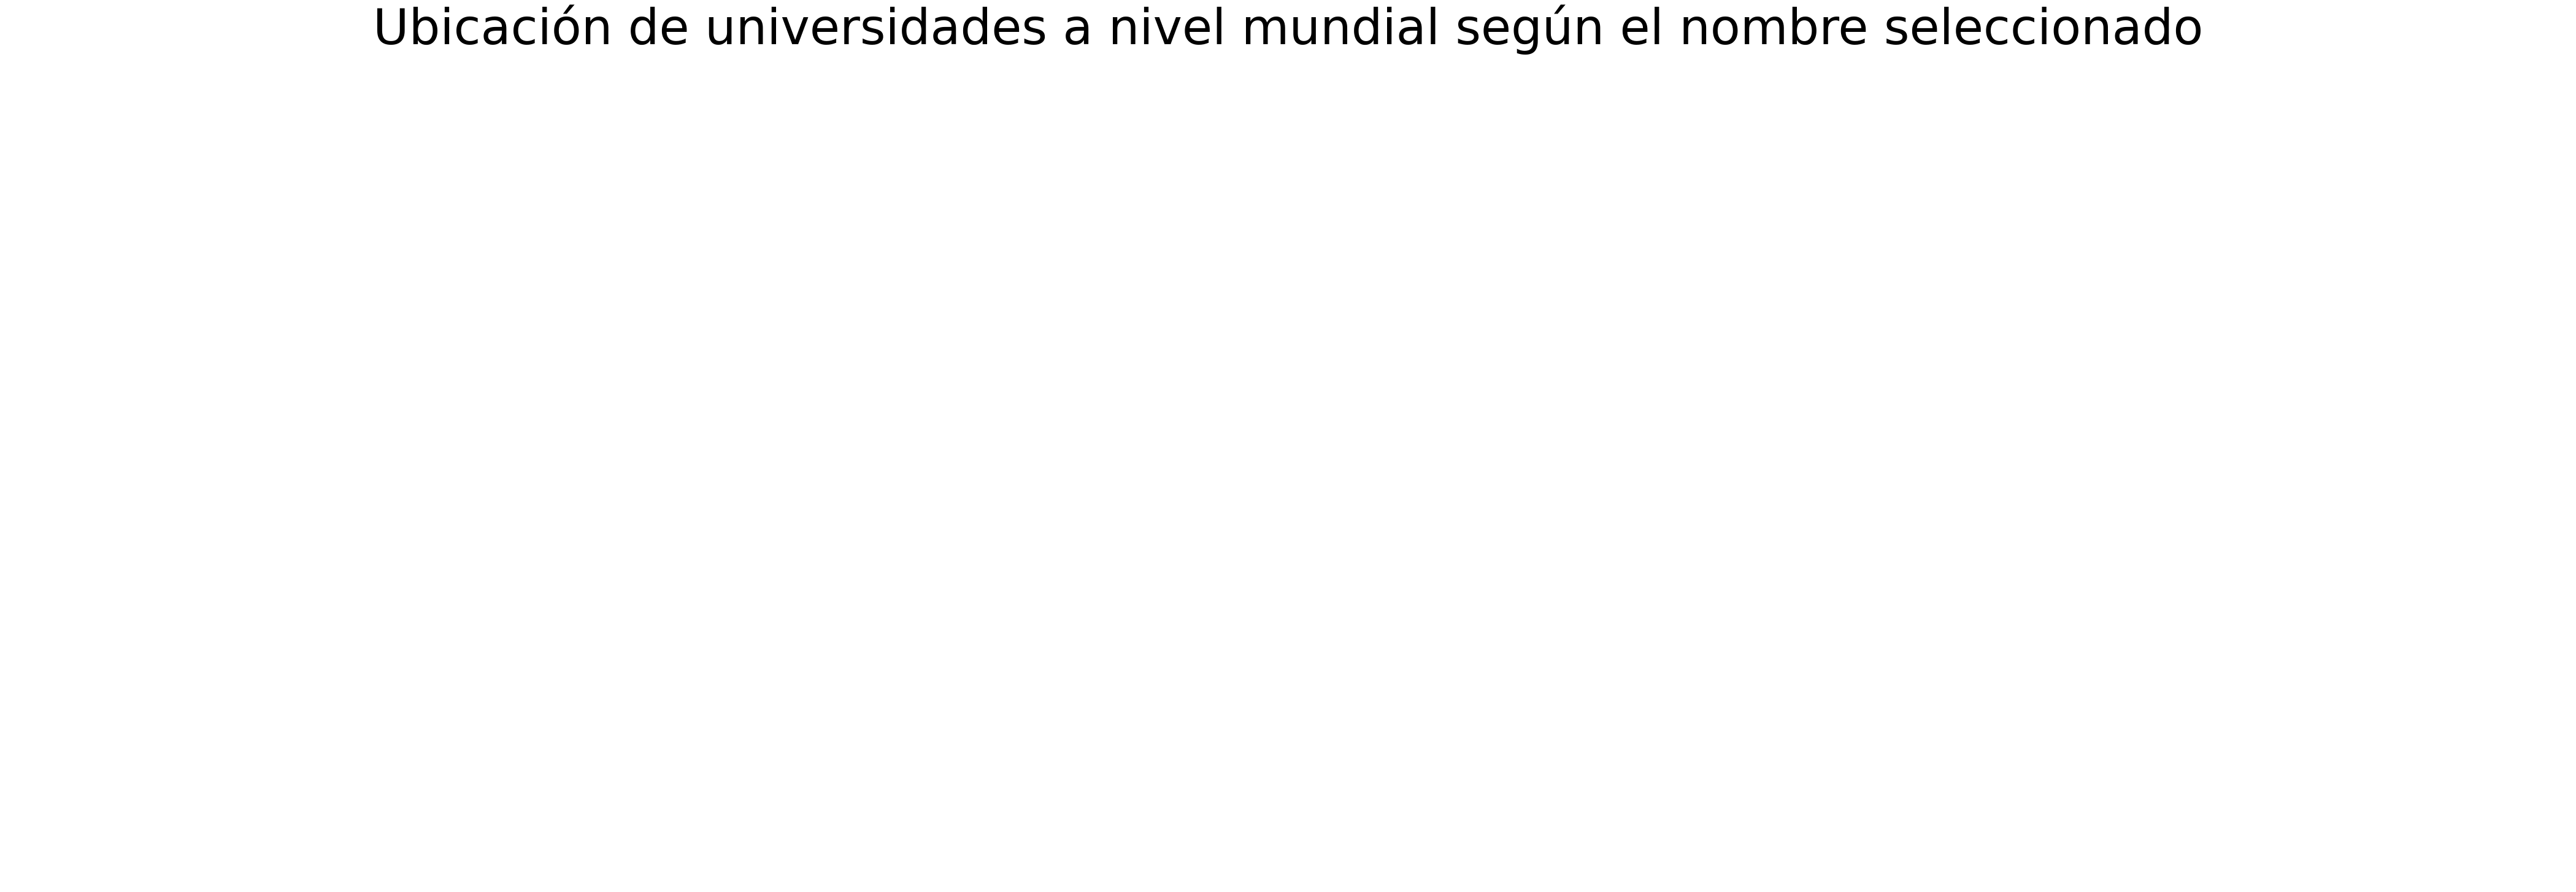

In [20]:
import matplotlib.pyplot as plt

# 4.1 Al momento de poner el mouse sobre el Marker, debe presentarse la universidad
# Debe considerar que existen valores de tipo None entre la latitud y longitud de los datos dados. Si se da el caso, 
# no debe presentar nada en el mapa#opciones de universidad
#...................................................
#Definimos el nombre de la figura y los ejes que vamos a utilizar
fig, ax = plt.subplots(1, figsize=(75,25))
ax.axis('off')
#Colocamos el Título del mapa
ax.set_title('Ubicación de universidades a nivel mundial según el nombre seleccionado',
             fontdict={'fontsize': '80', 'fontweight': '4'})
#punto de partida
center = (0,0)
m = Map(center=center, zoom=2, basemap = basemaps.Stamen.Terrain)
if (university.value[0] is not None) and (university.value[1]  is not None) :
    #genera una tupla de informacion 
    c = (university.value[0],university.value[1])
    
    marker = Marker(location=c, draggable=False,
                title="Universidad: %s\n" % (university.value[2] ))

    #agrega al mapa cada marca
    m.add_layer(marker);


# m.add_layer(magnifying_glass)
m

In [16]:
# 4. Cuando se seleccione una universidad, se debe ejecutar las sentencias que usen ipyleaflet y pinte en un mapa
#    la universidad.
 university.value

IndentationError: unexpected indent (863063985.py, line 3)

In [ ]:
# revisar el siguiente ejemplo

datos = [{"equipo":"Barcelona", "pais":"Ecuador", "disciplina":"Fútbol", "estadio": True}, 
         {"equipo":"Ineos", "pais":"Francia", "disciplina":"Ciclismo", "estadio": False},  
         {"equipo":"River Plate", "pais":"Argentina", "disciplina":"Fútbol", "estadio": True},
        {"equipo":"Ferrari", "pais":"Italia", "disciplina":"Automovilismo", "estadio": False},]

In [ ]:
# Analice la salida de  la lista de tupla llamada lista_tuplas_1
lista_tuplas_1 = [(d["equipo"]) for d in datos]
print(lista_tuplas_1)

In [ ]:
# Analice la salida de  la lista de tupla llamada lista_tuplas_2

lista_tuplas_2 = [(d["equipo"], d['disciplina']) for d in datos]
print(lista_tuplas_2)

In [ ]:
# Analice la salida de  la lista de tupla llamada lista_tuplas_3

lista_tuplas_3 = [((d["equipo"]), (d['pais'], d['estadio'])) for d in datos]
print(lista_tuplas_3)

In [ ]:
# Analice la salida
print(lista_tuplas_3[0])

In [ ]:
# Analice la salida
print(lista_tuplas_3[0][0])

In [ ]:
# Analice la salida
print(lista_tuplas_3[0][1])

In [ ]:
# Analice la salida de la siguientes sentencias

valor = None

if valor is None:
    print("Salida None")
    
if valor is not None:
    print("Salida sin None")
else:
    print("Salida None")

### Desarrolle el Reto